In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#graphing functions
def plotGenotype_2D(graphInfo, title="Genotype Generation plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["WPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["DPlots"],'r-')
    plt.plot(graphInfo["xPlots"],graphInfo["HPlots"],'m-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def plotAllele_2D(graphInfo, title="Allele Generation Plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["wPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["dPlots"],'r-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def model_3D(X,Y,Z,xLabel,yLabel, title):
    #3D graph
    import matplotlib.pyplot as plt
    from matplotlib import cm
    min=1000
    max=-1000
    for rIndex in range(len(Z)):
        for cIndex in range(len(Z[rIndex])):
            if Z[rIndex][cIndex]<min:
                min=Z[rIndex][cIndex]
            if Z[rIndex][cIndex]>max:
                max=Z[rIndex][cIndex]
    if min<-max:
        max=-min
    else:
        min=-max
    
    #label axes
    plt.xlabel(xLabel, fontdict=None, labelpad=None)
    plt.ylabel(yLabel, fontdict=None, labelpad=None)
    plt.title(title)

    
    plt.axis(aspect='image');
    plt.imshow(Z, origin='lower', extent=([0, 1, 0, 1]), vmax=max, vmin=min, cmap=cm.coolwarm)
    plt.show()

In [3]:
#model functions
def update_vars(oldDataDict, newDataDict):
    for key in newDataDict.keys():
        oldDataDict[key]=newDataDict[key]
    return oldDataDict
def run_generation_iX(simData):
    w=simData['qW']
    d=simData['qD']
    fW=simData['fW']
    fD=simData['fD']
    h=simData['h']
    fH=fW*(1-h)+fD*h
    eW=simData['eW']
    a=simData['a']
    if simData['curGen']<=simData['induceStart']:
        eD=simData['eD']
    else:
        eD=simData['eD']*(1-a)+simData['eDP']*a
    #prevent redundant multiplication and create less rounding errors
    w2=w*w
    wd=w*d
    d2=d*d
    ed2=eD*eD
    edew=eD*eW
    ednew=eD*(1-eW)
    nedew=(1-eD)*eW
    nednew=(1-eD)*(1-eW)
    
    fBar=1-((1-fW)*(w2+2*wd*ednew)+(1-fD)*(d2*(1-ed2)+2*wd*nedew)+(1-fH)*(2*wd*nednew)+d2*ed2+2*wd*edew)
    wPrime=(w2+2*wd*ednew)*fW + (wd*nednew)*fH
    dPrime=(d2*(1-ed2)+2*wd*nedew)*fD + (wd*nednew)*fH
    #wPrime=(fW*w2+fH*(wd*(1-e)))/fBar
    #dPrime=(fD*(d2+2*wd*e)+fH*(wd*(1-e)))/fBar
    #print({'w':wPrime, 'd':dPrime,'fB':1-fBar})
    #print(wPrime+dPrime+(1-fBar))
    wPrime/=fBar
    dPrime/=fBar
    
    #remove rounding errors
    total=wPrime+dPrime
    if total!=1:
        wPrime/=total
        dPrime/=total

    
    homoW=(w2+2*wd*eD*(1-eW))
    homoD=(d2*(1-eD*eD)+2*wd*(1-eD)*eW)
    heterozygote=(2*wd*(1-eD)*(1-eW))
    return {'qW':wPrime,'qD':dPrime,'WW':homoW,'DD':homoD,'WD':heterozygote}

    
def run_simulation_iX(simData,graph=False,debug=False):
    graphInfo={"xPlots": [0], "WPlots": [simData['qW']], "DPlots": [simData['qD']], "HPlots": [0], "wPlots":[simData['qW']], "dPlots":[simData['qD']]}
    w=simData['qW']*simData['fW']
    d=simData['qD']*simData['fD']
    total=w+d
    simData['qW']=w/total
    simData['qD']=d/total
    for i in range(1,simData['generations']+1):
        simData['curGen']=i
        update_vars(simData,run_generation_iX(simData))
        graphInfo['xPlots'].append(i)
        graphInfo['wPlots'].append(simData['qW'])
        graphInfo['dPlots'].append(simData['qD'])
        graphInfo['WPlots'].append(simData['WW'])
        graphInfo['DPlots'].append(simData['DD'])
        graphInfo['HPlots'].append(simData['WD'])
        if simData['qW']>.99999:
            if graph:
                plotGenotype_2D(graphInfo)
                plotAllele_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return -(i**(1/4))
        elif simData['qD']>.99999:
            if graph:
                plotGenotype_2D(graphInfo)
                plotAllele_2D(graphInfo)
            if debug:
                print(pd.DataFrame(graphInfo))
            return i**(1/4)
    if graph:
        plotGenotype_2D(graphInfo)
        plotAllele_2D(graphInfo)
    if debug:
        print(pd.DataFrame(graphInfo))
    return 0

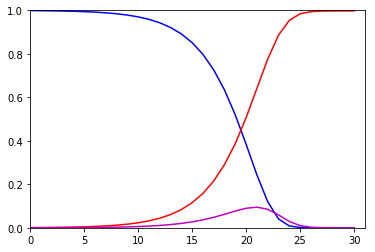

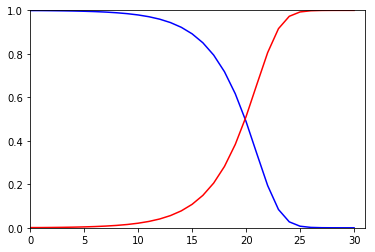

      DPlots    HPlots        WPlots    dPlots    wPlots  xPlots
0   0.001000  0.000000  9.990000e-01  0.001000  0.999000       0
1   0.001216  0.000304  9.984163e-01  0.001110  0.998890       1
2   0.001686  0.000421  9.978038e-01  0.001539  0.998461       2
3   0.002339  0.000584  9.969545e-01  0.002135  0.997865       3
4   0.003243  0.000810  9.957771e-01  0.002961  0.997039       4
5   0.004497  0.001122  9.941453e-01  0.004107  0.995893       5
6   0.006234  0.001554  9.918842e-01  0.005697  0.994303       6
7   0.008642  0.002152  9.887525e-01  0.007901  0.992099       7
8   0.011977  0.002979  9.844171e-01  0.010958  0.989042       8
9   0.016594  0.004119  9.784201e-01  0.015198  0.984802       9
10  0.022981  0.005688  9.701335e-01  0.021078  0.978922      10
11  0.031807  0.007841  9.587005e-01  0.029231  0.970769      11
12  0.043985  0.010783  9.429600e-01  0.040532  0.959468      12
13  0.060751  0.014778  9.213557e-01  0.056192  0.943808      13
14  0.083762  0.020153  8

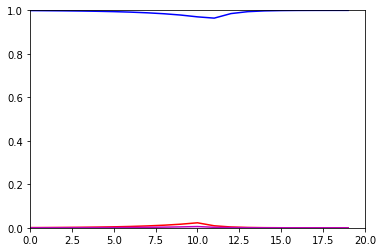

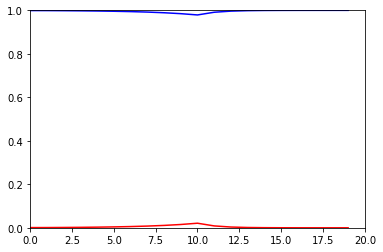

      DPlots    HPlots    WPlots    dPlots    wPlots  xPlots
0   0.001000  0.000000  0.999000  0.001000  0.999000       0
1   0.001216  0.000304  0.998416  0.001110  0.998890       1
2   0.001686  0.000421  0.997804  0.001539  0.998461       2
3   0.002339  0.000584  0.996954  0.002135  0.997865       3
4   0.003243  0.000810  0.995777  0.002961  0.997039       4
5   0.004497  0.001122  0.994145  0.004107  0.995893       5
6   0.006234  0.001554  0.991884  0.005697  0.994303       6
7   0.008642  0.002152  0.988752  0.007901  0.992099       7
8   0.011977  0.002979  0.984417  0.010958  0.989042       8
9   0.016594  0.004119  0.978420  0.015198  0.984802       9
10  0.022981  0.005688  0.970134  0.021078  0.978922      10
11  0.009290  0.002270  0.964272  0.008681  0.991319      11
12  0.003822  0.000947  0.985209  0.003522  0.996478      12
13  0.001550  0.000386  0.993986  0.001420  0.998580      13
14  0.000625  0.000156  0.997573  0.000571  0.999429      14
15  0.000251  0.000063  

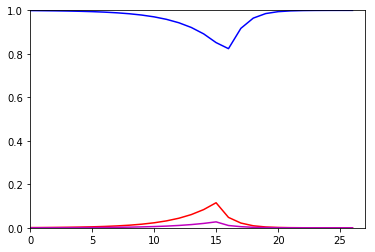

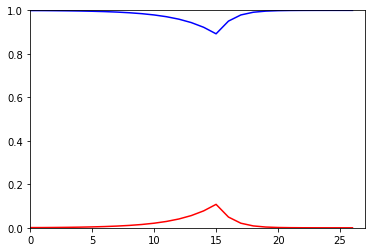

      DPlots    HPlots    WPlots    dPlots    wPlots  xPlots
0   0.001000  0.000000  0.999000  0.001000  0.999000       0
1   0.001216  0.000304  0.998416  0.001110  0.998890       1
2   0.001686  0.000421  0.997804  0.001539  0.998461       2
3   0.002339  0.000584  0.996954  0.002135  0.997865       3
4   0.003243  0.000810  0.995777  0.002961  0.997039       4
5   0.004497  0.001122  0.994145  0.004107  0.995893       5
6   0.006234  0.001554  0.991884  0.005697  0.994303       6
7   0.008642  0.002152  0.988752  0.007901  0.992099       7
8   0.011977  0.002979  0.984417  0.010958  0.989042       8
9   0.016594  0.004119  0.978420  0.015198  0.984802       9
10  0.022981  0.005688  0.970134  0.021078  0.978922      10
11  0.031807  0.007841  0.958700  0.029231  0.970769      11
12  0.043985  0.010783  0.942960  0.040532  0.959468      12
13  0.060751  0.014778  0.921356  0.056192  0.943808      13
14  0.083762  0.020153  0.891835  0.077871  0.922129      14
15  0.115195  0.027287  

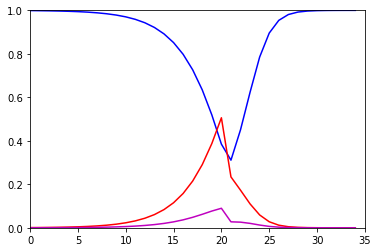

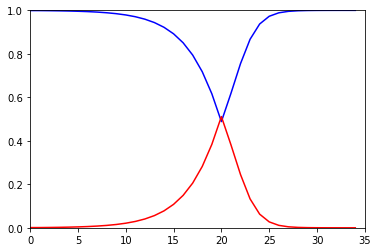

      DPlots    HPlots    WPlots    dPlots    wPlots  xPlots
0   0.001000  0.000000  0.999000  0.001000  0.999000       0
1   0.001216  0.000304  0.998416  0.001110  0.998890       1
2   0.001686  0.000421  0.997804  0.001539  0.998461       2
3   0.002339  0.000584  0.996954  0.002135  0.997865       3
4   0.003243  0.000810  0.995777  0.002961  0.997039       4
5   0.004497  0.001122  0.994145  0.004107  0.995893       5
6   0.006234  0.001554  0.991884  0.005697  0.994303       6
7   0.008642  0.002152  0.988752  0.007901  0.992099       7
8   0.011977  0.002979  0.984417  0.010958  0.989042       8
9   0.016594  0.004119  0.978420  0.015198  0.984802       9
10  0.022981  0.005688  0.970134  0.021078  0.978922      10
11  0.031807  0.007841  0.958700  0.029231  0.970769      11
12  0.043985  0.010783  0.942960  0.040532  0.959468      12
13  0.060751  0.014778  0.921356  0.056192  0.943808      13
14  0.083762  0.020153  0.891835  0.077871  0.922129      14
15  0.115195  0.027287  

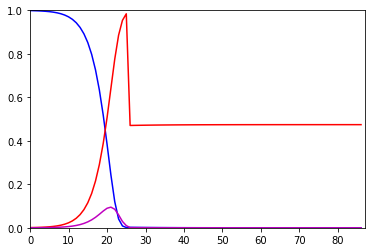

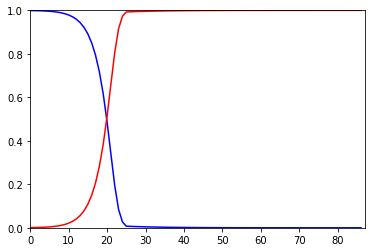

      DPlots    HPlots    WPlots    dPlots    wPlots  xPlots
0   0.001000  0.000000  0.999000  0.001000  0.999000       0
1   0.001216  0.000304  0.998416  0.001110  0.998890       1
2   0.001686  0.000421  0.997804  0.001539  0.998461       2
3   0.002339  0.000584  0.996954  0.002135  0.997865       3
4   0.003243  0.000810  0.995777  0.002961  0.997039       4
5   0.004497  0.001122  0.994145  0.004107  0.995893       5
6   0.006234  0.001554  0.991884  0.005697  0.994303       6
7   0.008642  0.002152  0.988752  0.007901  0.992099       7
8   0.011977  0.002979  0.984417  0.010958  0.989042       8
9   0.016594  0.004119  0.978420  0.015198  0.984802       9
10  0.022981  0.005688  0.970134  0.021078  0.978922      10
11  0.031807  0.007841  0.958700  0.029231  0.970769      11
12  0.043985  0.010783  0.942960  0.040532  0.959468      12
13  0.060751  0.014778  0.921356  0.056192  0.943808      13
14  0.083762  0.020153  0.891835  0.077871  0.922129      14
15  0.115195  0.027287  

3.0452616464756694

In [4]:
#accumulating rounding errors?
simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':10000}
run_simulation_iX(simData, True, True)

simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':10}
run_simulation_iX(simData,True,True)

simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':15}
run_simulation_iX(simData,True,True)

simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':20}
run_simulation_iX(simData,True,True)

simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':25}
run_simulation_iX(simData,True,True)

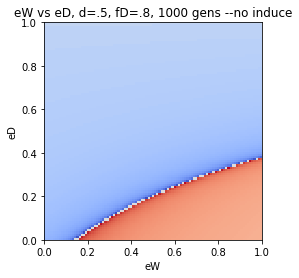

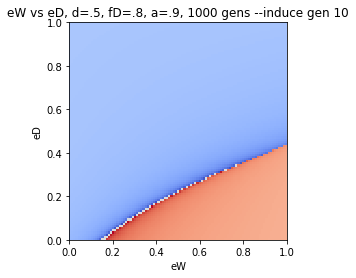

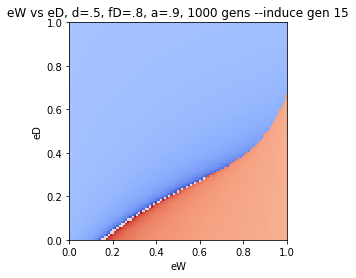

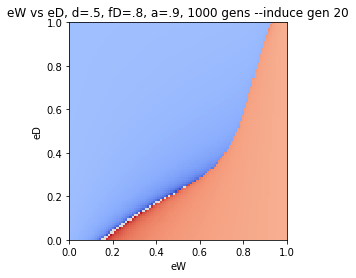

In [5]:
xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is eW
    for yIndex in range(len(yVals)):
        #y is eD
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':xVals[xIndex],'eD':yVals[yIndex],'eDP':0,'a':0,'generations':1000, 'induceStart':10000}
        takeover=run_simulation_iX(simData)
        Z[yIndex,xIndex]=takeover
model_3D(X,Y,Z,'eW','eD','eW vs eD, d=.5, fD=.8, 1000 gens --no induce')


xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is eW
    for yIndex in range(len(yVals)):
        #y is eD
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':xVals[xIndex],'eD':.05,'eDP':yVals[yIndex],'a':.9,'generations':1000, 'induceStart':10}
        takeover=run_simulation_iX(simData)
        Z[yIndex,xIndex]=takeover
model_3D(X,Y,Z,'eW','eD','eW vs eD, d=.5, fD=.8, a=.9, 1000 gens --induce gen 10')

xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is eW
    for yIndex in range(len(yVals)):
        #y is eD
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':xVals[xIndex],'eD':.05,'eDP':yVals[yIndex],'a':.9,'generations':1000, 'induceStart':15}
        takeover=run_simulation_iX(simData)
        Z[yIndex,xIndex]=takeover
model_3D(X,Y,Z,'eW','eD','eW vs eD, d=.5, fD=.8, a=.9, 1000 gens --induce gen 15')

xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is eW
    for yIndex in range(len(yVals)):
        #y is eD
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':xVals[xIndex],'eD':.05,'eDP':yVals[yIndex],'a':.9,'generations':1000, 'induceStart':20}
        takeover=run_simulation_iX(simData)
        Z[yIndex,xIndex]=takeover
model_3D(X,Y,Z,'eW','eD','eW vs eD, d=.5, fD=.8, a=.9, 1000 gens --induce gen 20')


In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

xvs=np.arange(0,1.01,.01)
alphas=np.arange(0,1.01,.01)
aB,xB=np.meshgrid(alphas,xvs)
zmaxReds=np.zeros((len(xvs),len(alphas)))


induceGens=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
induceGens=np.arange(0,101,1)
for i in range(len(induceGens)):
    ig=induceGens[i]
    print('iG: '+str(ig))
    xVals=np.arange(0,1.01,.01)
    yVals=np.arange(0,1.01,.01)
    X,Y=np.meshgrid(xVals,yVals)
    Z=np.zeros((len(xVals),len(yVals)))
    #run 2D sim e vs f
    for xIndex in range(len(xVals)):
        #x is eW
        for yIndex in range(len(yVals)):
            #y is eD
            simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'h':.5,'eW':xVals[xIndex],'eD':.05,'eDP':yVals[yIndex],'a':.9,'generations':1000, 'induceStart':ig}
            takeover=run_simulation_iX(simData)
            Z[yIndex,xIndex]=takeover
    #model3D(X,Y,Z,'eW','eD','eW vs eD, d=.5, fD=.8, a=.9, 1000 gens --induce gen 20')
    
    
    for i in range(len(Z)):
        #print(Z[i])
        col=''
        max=0
        for j in range(len(Z[i])):
            col+=str(Z[j][i])+','
            if j>max and Z[j][i]>0:
                max=j
        col+='-'
        #print(col)
        #print(max)
        zmaxReds[ig][i]=max


iG: 0
iG: 1
iG: 2
iG: 3
iG: 4
iG: 5
iG: 6
iG: 7
iG: 8
iG: 9
iG: 10
iG: 11
iG: 12
iG: 13
iG: 14
iG: 15
iG: 16
iG: 17
iG: 18
iG: 19
iG: 20
iG: 21
iG: 22
iG: 23
iG: 24
iG: 25
iG: 26
iG: 27
iG: 28
iG: 29
iG: 30
iG: 31
iG: 32
iG: 33
iG: 34
iG: 35
iG: 36
iG: 37
iG: 38
iG: 39
iG: 40
iG: 41
iG: 42
iG: 43
iG: 44
iG: 45
iG: 46
iG: 47
iG: 48
iG: 49
iG: 50
iG: 51
iG: 52
iG: 53
iG: 54
iG: 55
iG: 56
iG: 57
iG: 58
iG: 59
iG: 60
iG: 61
iG: 62
iG: 63
iG: 64
iG: 65
iG: 66
iG: 67


KeyboardInterrupt: 

In [ ]:
holdZ=np.array(zmaxReds)

In [ ]:
print("x=e, y=f, z=a")
fig = plt.figure()
ax = fig.gca(projection='3d')
zmaxReds=np.array(zmaxReds)
ax.plot_wireframe(aB, xB, zmaxReds, rstride=10, cstride=100, color='red')
plt.show()



In [ ]:
rot90=np.rot90(zmaxReds)
rot180=np.rot90(rot90)
rot270=np.rot90(rot180)
fig = plt.figure()
ax = fig.gca(projection='3d')
zmaxReds=np.array(zmaxReds)
ax.plot_wireframe(aB, xB, rot270, rstride=100, cstride=10, color='red')
plt.show()